### Author: <font color='red'> JACOB GOSS </font>

**Description:** This notebook file uses python to access the Hawaii wikipedia page and scrapes the Population of Hawaii table. This table describes the percentage of Hawaii's population based on their ancestry. Once the data is scraped, the file then puts that data into a Pie Chart with a legend and then a Bar Graph. I took the liberty to comment out unessecary code that I felt would be useful if I ever wish to do something like this again.

**Links:** 

[Hawaii Wikipedia webpage](https://en.wikipedia.org/wiki/Hawaii)

[Hawaii Population Information(Scroll a bit for exact table)](https://en.wikipedia.org/wiki/Hawaii#Population)

In [2]:
import urllib.request
url = "https://en.wikipedia.org/wiki/Hawaii"
page = urllib.request.urlopen(url)
from bs4 import BeautifulSoup
soup = BeautifulSoup(page, 'lxml')
#print(soup.prettify())

In [3]:
#finding and displaying all tables
all_sortable_tables = soup.find_all('table', class_='wikitable sortable')
c = 0
#for table in all_sortable_tables:
    #print(f"\n\nNEW TABLE[{c}]\n\n", table)
    #c += 1

In [4]:
#getting the right table I want to use
my_table = all_sortable_tables[1]
#my_table

In [5]:
#Gathering table data into lists
A=[]
B=[]
C=[]

for row in my_table.findAll('tr'):
    td=row.findAll('td')
    th=row.findAll('th')
    if len(td) == 2 and len(th) == 1:
        A.append(td[0].find(text=True))
        B.append(th[0].find(text=True))
        #C.append(td[1].find(text=True)) #Not needed for plotting

In [6]:
#Putting lists into DataFrame
import pandas as pd
df=pd.DataFrame(A, columns=['Ancestry'])
df['Percentage']=B
df['Percentage']= df['Percentage'].str.replace('\n', '') #Ensures no '\n'
df['Percentage']= df['Percentage'].str.replace('%', '') #Ensures no '%'
df['Percentage'] = df['Percentage'].astype(float) #Converts to float
#df['Main Article']=C not needed for plotting
df

,Ancestry,Percentage
0,Filipino,13.6
1,Japanese,12.6
2,Polynesian,9.0
3,Germans,7.4
4,Irish,5.2
5,English,4.6
6,Portuguese,4.3
7,Chinese,4.1
8,Korean,3.1
9,Mexican,2.9


<ipython-input-7-b2f371aba5d4>:15: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(df['Percentage'], labels=A, bbox_to_anchor=(1, 0., 0.5, 1))


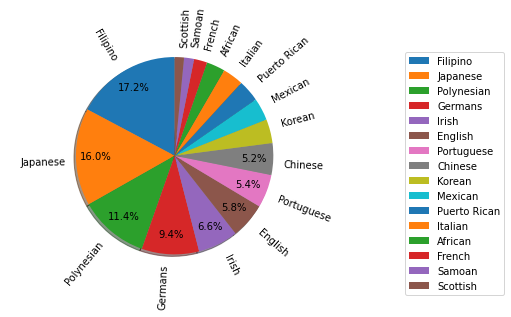

In [7]:
from matplotlib import pyplot as plt
#generates the autopct and won't display unless percent is past designated limit
def autopct_generator(limit):
    def inner_autopct(pct):
        return ('%.1f%%' % pct) if pct > limit else ''
    return inner_autopct

#Plotting Data as PieChart
fig1, ax1 = plt.subplots()
ax1.pie(df['Percentage'], labels=A, autopct=autopct_generator(5),
        shadow=True, startangle=90, pctdistance=0.8, rotatelabels=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#Plotting legend for PieChart
plt.legend(df['Percentage'], labels=A, bbox_to_anchor=(1, 0., 0.5, 1))
plt.show()

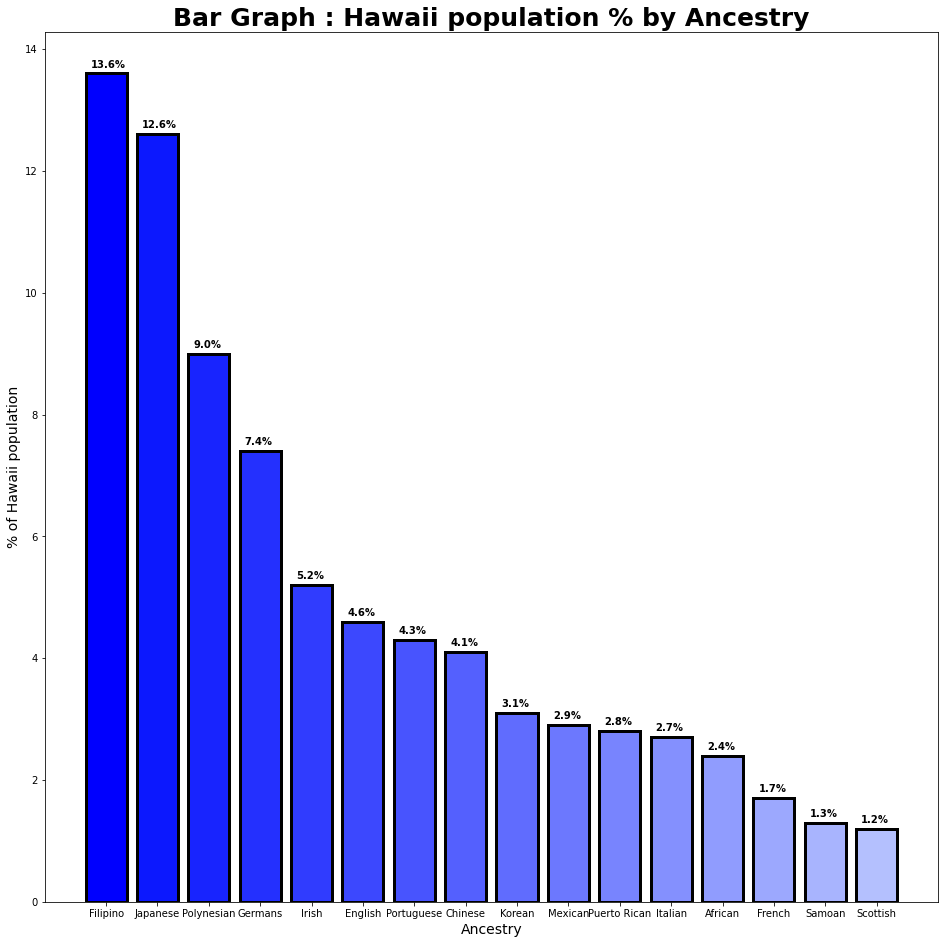

In [13]:
#Plotting Data as Bar Graph

#takes a hex value and diminishes it. Returns it in usuable format for this project 
def hex_diminish(c):
  try:
    c = c.replace('#', '')
  except:
    print("No #")
  rate_of_change = 12
  r = c[0:2]
  g = c[2:4]
  b = c[4:7]
  r = int(r, 16)
  g = int(g, 16)
  r = r + rate_of_change;
  g = r + rate_of_change;
  r = hex(int(r))
  g = hex(int(g))
  r = r.replace('x','')
  g = g.replace('x','')
  if len(r) == 3:
    r = r[1:]
  if len(g) == 3:
    g = g[1:]
  new_color = r + g + b
  new_color = ''.join(('#', new_color))
  return(new_color)

plt.figure(figsize=(len(df['Ancestry']),len(df['Percentage'])))
barlist = plt.bar(range(0,len(df['Ancestry'])), df['Percentage'], ec='black', lw=3)
plt.xticks(range(len(df['Ancestry'])), df['Ancestry'])

#sets colors for bars
color = '#0000fe'
for i in range(len(barlist)):
    try:
        barlist[i].set_color(color)
    except:
        print("invalid color chosen")
    barlist[i].set_edgecolor("black")
    color = hex_diminish(color)

#setting labels and title for Bar Graph
plt.ylabel("% of Hawaii population", size=14)
plt.xlabel("Ancestry", size=14)
plt.title("Bar Graph : Hawaii population % by Ancestry", weight="bold", size=25)

#Adds the percentage at the top of each bar for better clarity
for index, data in enumerate(df['Percentage']):
    plt.text(x=index-0.3, y=data+0.1, s=f"{data}%", weight="semibold")

plt.show()